In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd

# Xmas Everything Revenue Analysis

In this analysis, we'll visualize the total revenue over time from Xmas Everything. This helps us understand sales trends and identify any significant changes or patterns in revenue generation.

## Data Preparation

First, we load the data from our Shopify orders export file. We ensure the 'Paid at' column, which represents when the order was paid, is in datetime format to accurately plot our timeline. We also filter out any orders without a payment date. Finally, we use groupby to aggregate the total revenue by date.

## Visualization

With our data prepared, we plot the total revenue over time. We use an orange line to represent the revenue trend. The x-axis is formatted to show the date in a 'MMM DD, YY' format for easy reading. Additionally, we ensure the y-axis is formatted to display values as currency. To focus on the data, we remove the top and right spines of the plot.

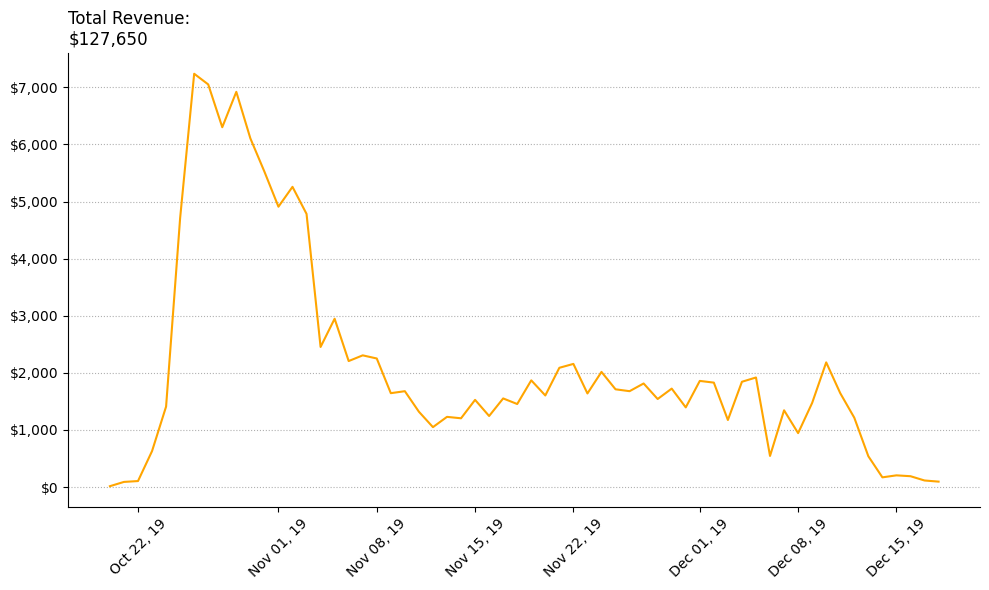

In [156]:
df_orders = pd.read_csv('orders_export_1.csv')

df_orders['Paid at'] = pd.to_datetime(df_orders['Paid at'])
df_orders = df_orders.dropna(subset=['Paid at'])

total_revenue = df_orders.groupby(df_orders['Paid at'].dt.date)['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(total_revenue['Paid at'], total_revenue['Total'], linestyle='-', color="orange")
plt.title(f'Total Revenue: \n${total_revenue["Total"].sum():,.0f}', loc='left')
plt.xticks(rotation=45)
plt.subplot().yaxis.set_major_formatter('${x:,.0f}')
plt.subplot().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %y'))
plt.grid(True, which='major', axis='y', linestyle='dotted')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig("revenue.png", transparent=True)
plt.show()

In [24]:
orders_by_state = df_orders['Shipping Province Name'].value_counts().reset_index()
orders_by_state.columns = ['State', 'Orders']

# Replace NaN values in the 'Orders' column with 0 (assuming states with no orders should be accounted for)
gdf_merged['Orders'] = gdf_merged['Orders'].fillna(0)

load US states

In [29]:
gdf_states = gpd.read_file('cb_2018_us_state_20m.shp')
#merge order data with geospatial data
gdf_merged = gdf_states.merge(orders_by_state, left_on='NAME', right_on='State', how='left')

#replace NaN values in the 'Orders' column with 0
gdf_merged['Orders'] = gdf_merged['Orders'].fillna(0)

plot

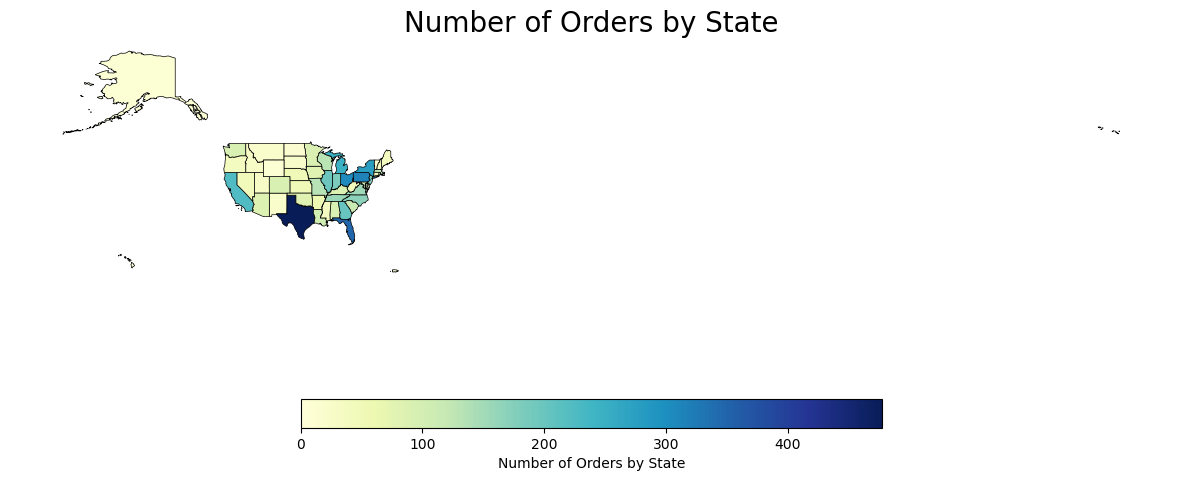

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot with an improved color scheme and additional customizations
gdf_merged.plot(column='Orders', ax=ax, legend=True,
                cmap='YlGnBu',  # Change color map to 'YlGnBu' for better visual appeal
                edgecolor='black',  # Add edgecolor to distinguish between states
                linewidth=0.5,  # Set linewidth to make borders more subtle
                legend_kwds={'label': "Number of Orders by State",
                             'orientation': "horizontal",
                             'shrink': 0.5})  # Adjust legend size to be less obtrusive

ax.set_title('Number of Orders by State', fontdict={'fontsize': 20}, loc='center')  # Add a title
ax.axis('off')  # Turn off the axis for a cleaner look

plt.savefig("heatmap2.png", transparent=True)
plt.show()

# Visualization of Orders by State for Inventory Optimization

In our ongoing efforts to optimize operations and improve customer satisfaction, we relocated our inventory to two warehouses, one in New Jersey and the other in San Francisco. This strategic placement is designed to streamline our fulfillment process, ensuring that orders are processed and delivered in the most efficient manner possible. The initial distribution of inventory was even between these two warehouses, but we learned quickly that our New Jersey inventory would deplete quicker than our San Francisco one. This visualization will help us determine if there was indeed a geographical demand that favored the east coast.

## Data Preparation

We begin by loading our orders data, which includes the shipping destination for each order. Next, we prepare a GeoDataFrame that maps each state to its corresponding number of orders. We utilize the cb_2018_us_state_20m.shp shapefile that we got from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html for the geographic boundaries of the states. Due to our first attempt being too zoomed out, we opted to exclude certain territories and states to focus on the continental United States.

Initial attempt:
<div>
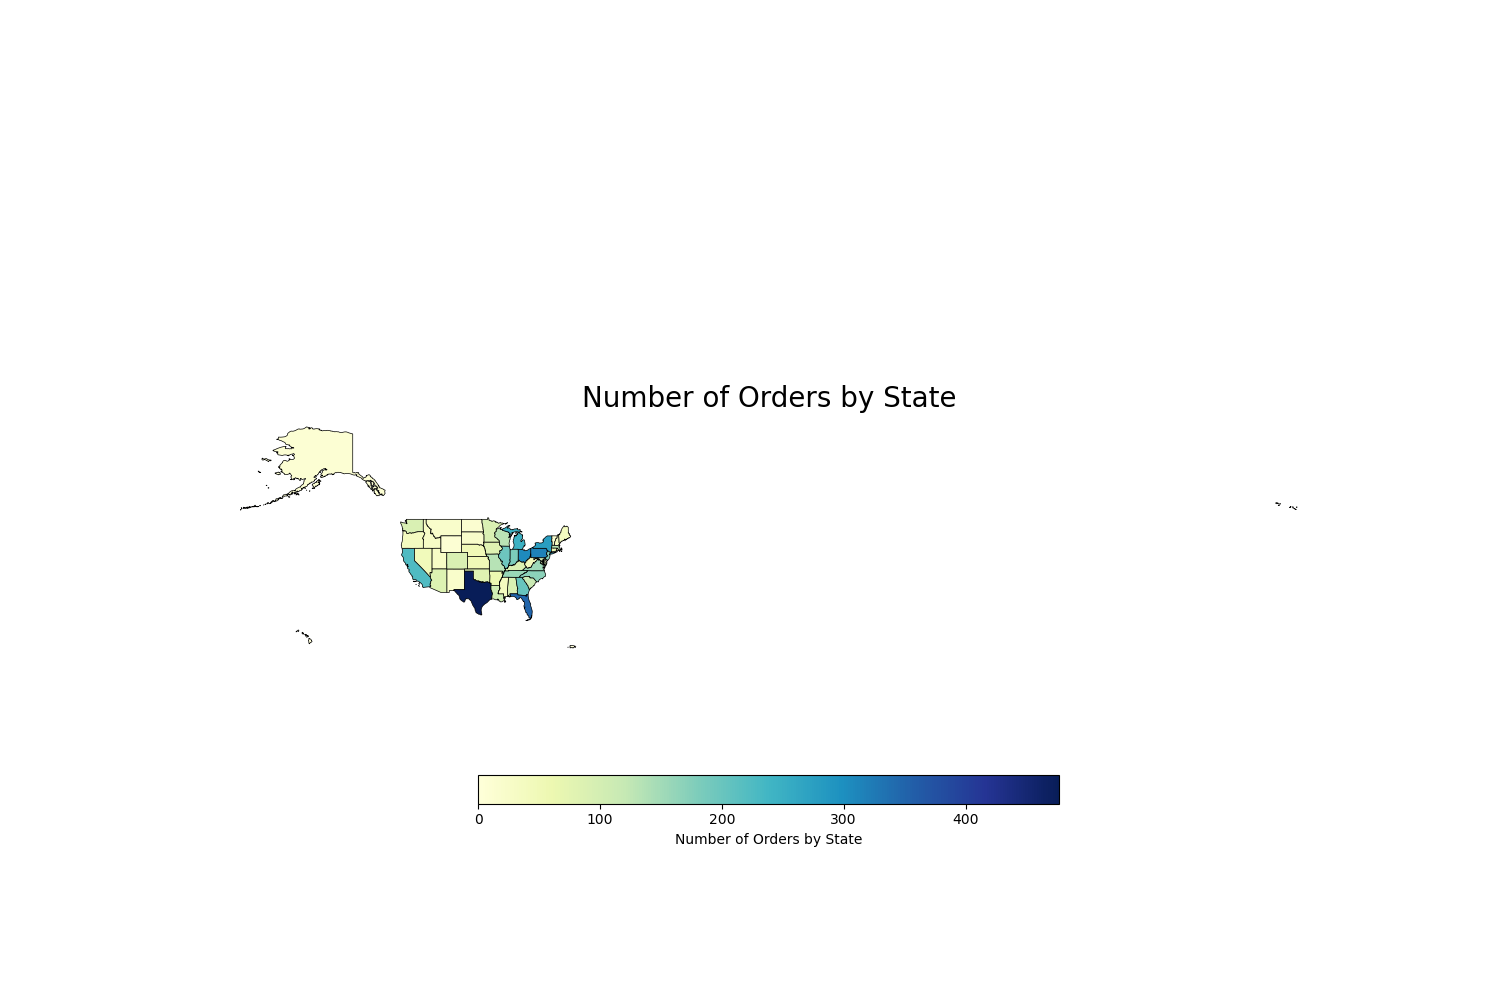
</div>


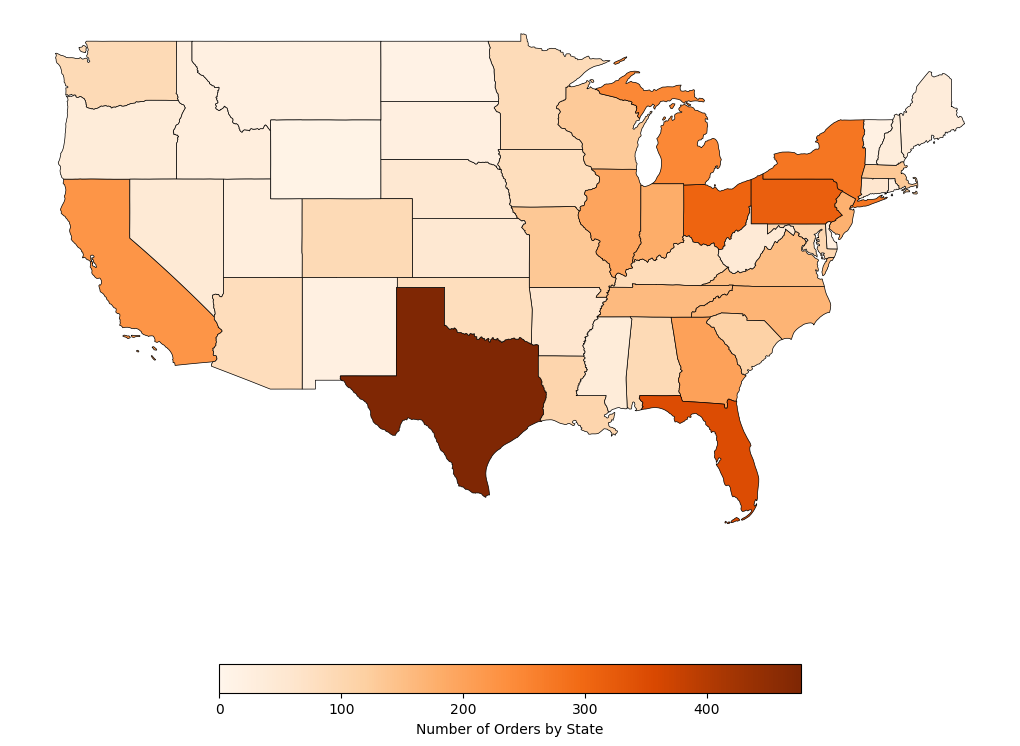

In [175]:
orders_by_state = df_orders['Shipping Province Name'].value_counts().reset_index()
orders_by_state.columns = ['State', 'Orders']

gdf_merged['Orders'] = gdf_merged['Orders'].fillna(0)

gdf_states = gpd.read_file('cb_2018_us_state_20m.shp')
gdf_merged = gdf_states.merge(orders_by_state, left_on='NAME', right_on='State', how='left')

gdf_merged['Orders'] = gdf_merged['Orders'].fillna(0)

exclude = ['Puerto Rico', 'Guam', 'Virgin Islands', 'American Samoa', 'Northern Mariana Islands', 'Alaska', 'Hawaii']

gdf_filtered = gdf_merged[~gdf_merged['State'].isin(exclude)]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_filtered.plot(column='Orders', ax=ax, legend=True,
                  cmap='Oranges', edgecolor='black', linewidth=0.5,
                  legend_kwds={'label': "Number of Orders by State",
                               'orientation': "horizontal",
                               'shrink': 0.5})


ax.axis('off')
plt.savefig("heatmap.png", transparent=True)
plt.show()

# Conversion Rate Comparison Analysis

In this analysis, we aim to compare Xmas Everything's conversion rate against industry benchmarks to evaluate our performance and identify potential areas for improvement. We utilize data from our website traffic and order placements to calculate our total conversion rate.

## Data Preparation

We start by loading traffic data from a CSV file, which includes total orders placed and total sessions for a given period. With this data, we calculate our store's total conversion rate.

## Comparison with Industry Benchmarks

To put our conversion rate into perspective, we compare it against the Shopify average, collected from Littledata in their 2022 survey of 3000+ stores, and the clothing industry average, collected from IPR Commerce for January 2024. This comparison helps us understand our performance relative to general and industry-specific benchmarks.

## Visualization

We use a horizontal bar graph to visualize the comparison, making it easier to see how our conversion rate stacks up against the benchmarks. Each bar represents a different data source: Shopify Average, Clothing Industry Average, and our Total Conversion Rate. We use an opaque orange for the benchmarks to help differentiate the data from our own. We also adjust the x-axis limits to add some space to the right of the longest bar for better readability. Finally, we add a text label indicating the exact conversion rate percentage for each bar and remove the top and right spines of the plot to focus on the data. 

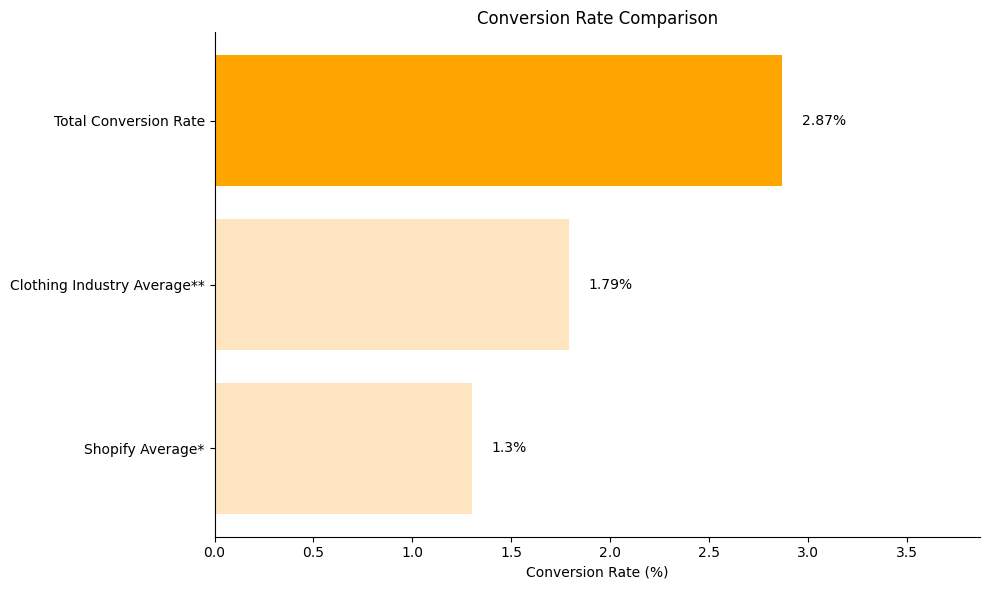

In [168]:
df_traffic = pd.read_csv('visits_2019-10-01_2019-12-31.csv')

total_conversion_rate = round((df_traffic['total_orders_placed'].sum() / df_traffic['total_sessions'].sum()) * 100, 2)

data = {
    'Source': ['Shopify Average*', 'Clothing Industry Average**', 'Total Conversion Rate'],
    'Conversion Rate (%)': [1.3, 1.79, total_conversion_rate]
}

comparison_data = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.barh(comparison_data['Source'], comparison_data['Conversion Rate (%)'], color=[(1, 0.6, 0, 0.25), (1, 0.6, 0, 0.25), 'orange'])
plt.xlabel('Conversion Rate (%)')
plt.title('Conversion Rate Comparison')
plt.xlim(0, max(comparison_data['Conversion Rate (%)']) + 1)  # Add some space to the right

for index, value in enumerate(comparison_data['Conversion Rate (%)']):
    plt.text(value + 0.1, index, f"{value}%", va='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig("hbar.png", transparent=True)
plt.show()

# Payment Methods Distribution

Following the revenue analysis, we observed a significant surge followed by a steep decline. This downturn coincided with a suspension of advertising efforts, a direct consequence of PayPal freezing Xmas Everything's assets pending the conclusion of their investigation. Adjustments were made to guarantee that orders were fulfilled promptly, relying solely on the incoming funds from Shopify Payments. To grasp the extent of the impact caused by PayPal's asset freeze, it's essential to examine the proportion of orders processed through PayPal. In this context, we present a visualization that breaks down the order distribution by the payment methods employed.

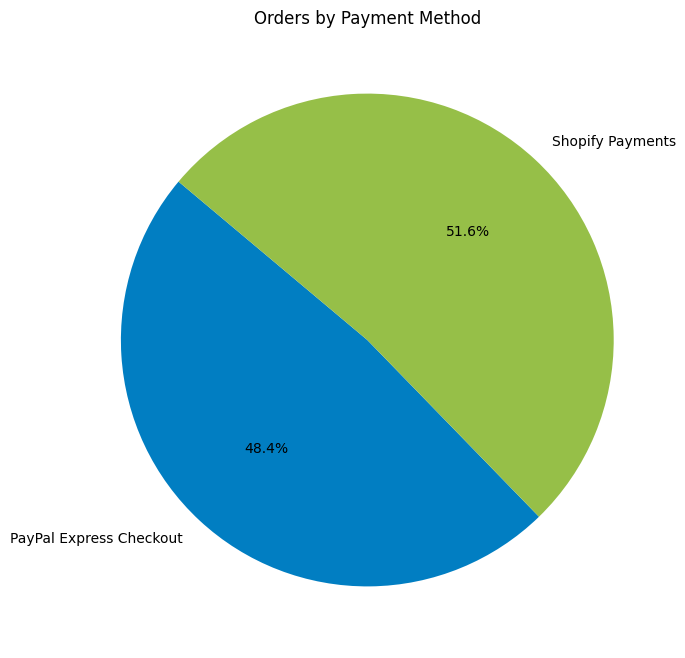

In [166]:
payment_methods = df_orders['Payment Method'].value_counts()[['PayPal Express Checkout', 'Shopify Payments']]

plt.figure(figsize=(8, 8))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', startangle=140, colors=[(1/255, 126/255, 194/255), (150/255, 191/255, 72/255)])
plt.title('Orders by Payment Method')

plt.savefig("piechart.png", transparent=True)
plt.show()